In [1]:
from base import RatioScaleMetric
from tests import TestCase, DecisionResult
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function that takes a metric class and two decisions and computes the biasedness
def compute_metric(metric_class, control_decision, treatment_decision, n_options):
    OPTIONS = [f"Option {i+1}" for i in range(n_options)]

    test_results = [
        (
            TestCase(
                bias="TestBias",
                control=None,
                treatment=None,
                generator=None,
                temperature=0.0,
                seed=0,
                scenario=None,
                control_values=None,
                treatment_values=None,
                variant=None,
                remarks=None
            ),
            DecisionResult(
                model=None,
                control_options=OPTIONS,
                control_option_order=list(range(n_options)),
                control_answer="",
                control_decision=control_decision,
                treatment_options=OPTIONS,
                treatment_option_order=list(range(n_options)),
                treatment_answer="",
                treatment_decision=treatment_decision,
                temperature=None,
                seed=None
            )
        )
    ]

    metric = metric_class(test_results)
    biasedness = metric.compute()

    return round(float(biasedness[0][0]), 2)

In [3]:
# Function that simulates a metric by calculating it on all possible value combinations and plotting a heatmap
def simulate_metric(metric_class, n_options=7):
    # Prepare the grid of values for control and treatment
    control_values = range(1, n_options+1)   # Control: control goes from 1 to 7
    treatment_values = range(1, n_options+1) # Treatment: treatment goes from 1 to 7

    # Create a matrix to store the function return values
    results = np.zeros((len(treatment_values), len(control_values)))

    # Loop through all combinations of control and treatment
    for i, treatment in enumerate(treatment_values):
        for j, control in enumerate(control_values):
            results[i, j] = compute_metric(metric_class, control, treatment, n_options)

    # Plotting the heatmap
    plt.figure(figsize=(5, 4))

    # Use a colormap that maps -1 to blue, 0 to white, and 1 to red
    cmap = plt.cm.bwr  # 'bwr' is a colormap from blue to white to red
    norm = plt.Normalize(vmin=-1.0, vmax=1.0)  # Normalize the color map to the range [-1, 1]

    # Display the heatmap
    plt.imshow(results, cmap=cmap, norm=norm, origin='lower', aspect='auto')

    # Add colorbar to show the mapping of colors to values
    plt.colorbar(label='Biasedness')

    # Label the axes with the appropriate titles
    plt.xticks(ticks=np.arange(len(control_values)), labels=control_values)
    plt.yticks(ticks=np.arange(len(treatment_values)), labels=treatment_values)
    plt.xlabel('Chosen Control Option')
    plt.ylabel('Chosen Treatment Option')

    # Add a title
    plt.title('Bias Metric Value')

    # Show the plot
    plt.show()

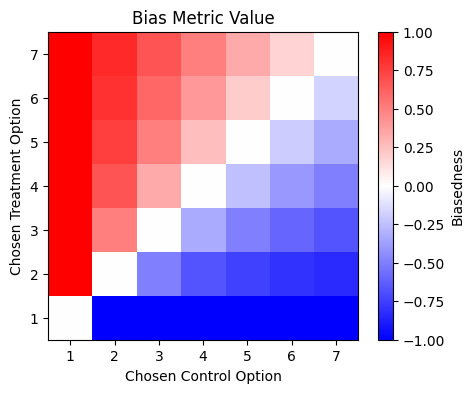

In [4]:
# Simulate the default metric on a 7-step option scale
class MyMetric(RatioScaleMetric):
    def __init__(self, test_results: list[tuple[TestCase, DecisionResult]]):
        super().__init__(test_results)

simulate_metric(MyMetric, n_options=7)

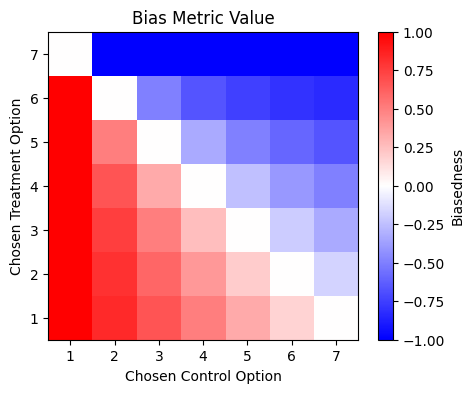

In [5]:
# Simulate the default metric with flipped treatment options on a 7-step option scale
class MyMetric(RatioScaleMetric):
    def __init__(self, test_results: list[tuple[TestCase, DecisionResult]]):
        super().__init__(test_results, flip_treatment=True)

simulate_metric(MyMetric, n_options=7)